In [1]:
from matplotlib import pyplot as plt
from scipy.stats import stats
from scipy.stats import ttest_ind
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets
import pandas as pd
import numpy as np
import scipy.stats as st
import pandas as pd

In [2]:
clean_data = "Resource/movie_clean.csv"
clean_data_df = pd.read_csv(clean_data)
clean_data_df

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller",2017-11-13,300000000,655945209,93842239.0,PG-13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
455,544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney, Sebastian Koch, Ma...",2013-02-06,92000000,304249198,24834845.0,R,Action
456,545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark, Laurence Harvey, ...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
457,546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton, Emilio Echev...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
458,547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine, Frank Langella, M...",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure


Correlation coefficient (r): 0.38
Probability value (p): 4.818111598768967e-17


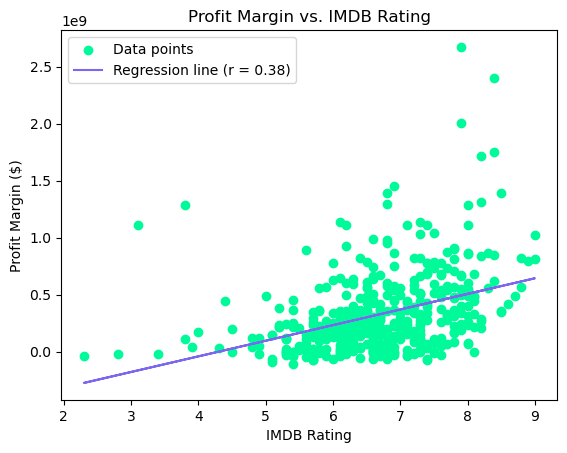

In [3]:
# Calculate Profit Margin
clean_data_df['Profit Margin'] = clean_data_df['Worldwide Gross'] - clean_data_df['Production Cost']

# Perform linear regression using scipy
rating = clean_data_df['Rating']
profit_margin = clean_data_df['Profit Margin']
slope, intercept, r_value, p_value, std_err = linregress(rating, profit_margin)

# Calculate the regression line values
regression_line = slope * rating + intercept

# Print the r_value and p_value
print(f'Correlation coefficient (r): {r_value:.2f}')
print(f'Probability value (p): {p_value}')

# Plotting
plt.scatter(rating, profit_margin, color='mediumspringgreen', label='Data points')
plt.plot(rating, regression_line, color='mediumslateblue', label=f'Regression line (r = {r_value:.2f})')
plt.xlabel('IMDB Rating')
plt.ylabel('Profit Margin ($)')
plt.title('Profit Margin vs. IMDB Rating')
plt.legend()
#Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/profitvrating.png")
plt.show()

<Figure size 1000x600 with 0 Axes>

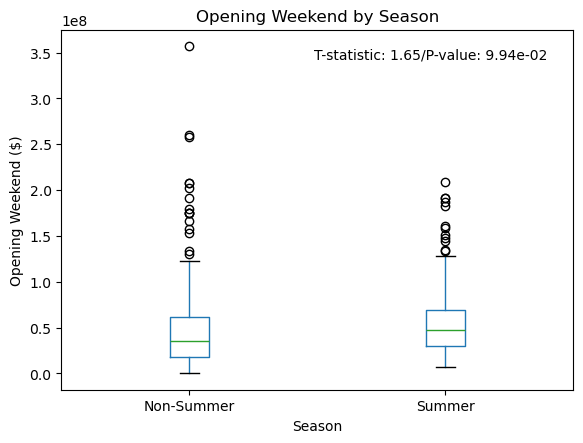

T-statistic: 1.65
P-value: 0.10


In [5]:
# Convert 'Release Date' to datetime
clean_data_df['Release Date'] = pd.to_datetime(clean_data_df['Release Date'])

# Define the summer months
summer_months = [5, 6, 7, 8, 9]

# Categorize 'Release Date' into 'Summer' and 'Non-Summer'
clean_data_df['Season'] = np.where(clean_data_df['Release Date'].dt.month.isin(summer_months), 'Summer', 'Non-Summer')

# Independent t-test
summer_data = clean_data_df[clean_data_df['Season'] == 'Summer']['Opening Weekend']
non_summer_data = clean_data_df[clean_data_df['Season'] == 'Non-Summer']['Opening Weekend']
t_stat, p_val = ttest_ind(summer_data, non_summer_data, equal_var=False)

# Box plot for visualization
plt.figure(figsize=(10, 6))
clean_data_df.boxplot(column='Opening Weekend', by='Season', grid=False)
plt.text(0.95, 0.95, f'T-statistic: {t_stat:.2f}/P-value: {p_val:.2e}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')
plt.title('Opening Weekend by Season')
plt.suptitle('')
plt.xlabel('Season')
plt.ylabel('Opening Weekend ($)')
#Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/openingbyseason.png")
plt.show()

print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_val:.2f}')